# Load data

In [1]:
import pandas as pd
import json
import seaborn as sns
%pylab inline

#load about_pages
about_pages=pd.read_csv('de/all_data_bias_labour_gender_all_persons.csv',sep='\t', encoding='utf-8',index_col=0)#885
df=about_pages
df.male_amount.fillna(0, inplace=True)
df.female_amount.fillna(0, inplace=True)
df.rename(columns={"male_person_amount":"male_links","female_person_amount":"female_links",
                    "male_amount":"male_polyglot","female_amount":"female_polyglot"},inplace=True)
df.describe()

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,male_links,female_links,labor_market_woman,labor_market_all,female_polyglot,male_polyglot,male_all_amount,female_all_amount
count,885.000000,885.000000,871.000000,871.000000,885.000000,885.000000,885.000000,885.000000
mean,3.033898,0.392090,38.899658,94448.776119,0.874576,4.009040,4.848588,0.926554
std,12.024531,2.585406,28.027713,220534.277636,3.557714,11.785696,14.342202,3.890211
min,0.000000,0.000000,0.170746,15.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.937104,4882.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,35.508637,17815.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,60.662900,90627.000000,0.000000,3.000000,3.000000,0.000000
max,161.000000,61.000000,99.843137,1969075.000000,70.000000,175.000000,186.000000,78.000000


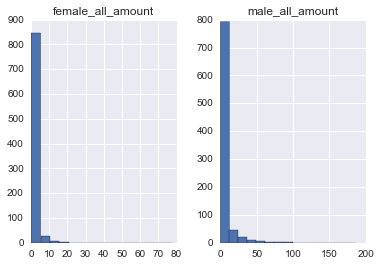

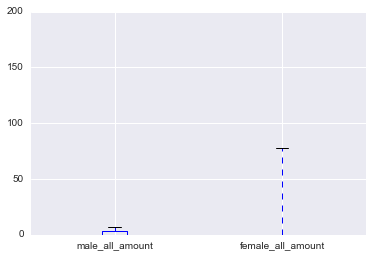

In [2]:
df.hist(bins=15,column=["male_all_amount","female_all_amount"])
plt.show()
plt.show(df.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"]))

In [2]:
#Remove data where there is no male person neither female  simultaneously
df_0=df[(df.male_all_amount==0)& (df.female_all_amount==0)]#474
df=df[(df.male_all_amount>0)| (df.female_all_amount>0)]#411

about_pages=pd.read_csv('de/all_data_bias_labour_gender.csv',sep='\t', encoding='utf-8',index_col=0)
df["labor_market_women_ratio"]=df.apply(lambda x: about_pages.loc[x.profession,"labor_market_woman"],axis=1)
#df[df.labor_market_woman.isnull()]

print "There are ",len(df),"profesions with at least one person"
df.loc[:,'f_m_all_amount'] = df['male_all_amount']+ df['female_all_amount']
df.describe()

There are  411 profesions with at least one person


,male_links,female_links,labor_market_woman,labor_market_all,female_polyglot,male_polyglot,male_all_amount,female_all_amount,labor_market_women_ratio,f_m_all_amount
count,411.000000,411.000000,404.000000,404.000000,411.000000,411.000000,411.000000,411.000000,404.000000,411.000000
mean,6.532847,0.844282,40.902376,78453.732673,1.883212,8.632603,10.440389,1.995134,40.902376,12.435523
std,16.995143,3.745578,25.700816,189547.025538,5.038485,16.108286,19.621000,5.522016,25.700816,22.092767
min,0.000000,0.000000,0.170746,15.000000,0.000000,0.000000,0.000000,0.000000,0.170746,1.000000
25%,0.000000,0.000000,18.376209,2626.000000,0.000000,1.000000,1.000000,0.000000,18.376209,2.000000
50%,1.000000,0.000000,41.516517,12000.000000,0.000000,3.000000,3.000000,1.000000,41.516517,5.000000
75%,5.000000,0.000000,60.400000,71678.000000,2.000000,9.000000,11.000000,2.000000,60.400000,12.000000
max,161.000000,61.000000,99.843137,1969075.000000,70.000000,175.000000,186.000000,78.000000,99.843137,194.000000


In [8]:
df[(df.male_all_amount>20)&(df.labor_market_domin=="female")]

,male_links,all_link,lead,text,male_person,female_person,female_links,Bias,prof_gender,labor_market_domin,profession,male,female_polyglot,female,male_polyglot,male_all,female_all,male_all_amount,female_all_amount,f_m_all_amount
Apotheker,20,"[Léo_Apotheker, Arzneimittel, Bundes-Apotheker...",Apotheker sind Fachkräfte für Arzneimittel. Si...,Apotheker sind Fachkräfte für Arzneimittel. Si...,"[Léo_Apotheker, Friedrich_II._(HRR), Friedrich...",[Magdalena_Meub],1,neutral,male,female,Apotheker,"[Franz - Josef Kuhlen, Christoph Friedrich, Jo...",1,[Magdalena Meub],26,"[Friedrich II, August Oetker, Emanuel Merck, C...",[Magdalena Meub],29,1,30
Arzt,5,"[Arzt_(Begriffsklärung), Trauma_(Medizin), Kra...",Ein Arzt beschäftigt sich mit der Vorbeugung (...,Ein Arzt beschäftigt sich mit der Vorbeugung (...,"[Elmar_Brähler, Otto_F._Kernberg, Pantaleon_(H...",[],0,male,male,female,Arzt,"[Bernhard Strauß, Rhys Clement:Mirror, Lothar ...",3,"[Vittoria Bucknall, Deborah MacDonald, Kathy C...",20,"[Elmar Brähler, Otto F Kernberg, Werner E Gera...","[Vittoria Bucknall, Deborah MacDonald, Kathy C...",21,3,24
Ballettmeister,23,"[Jules_Perrot, Edgar_Degas, Englische_Sprache,...","Ein Ballettmeister (engl. Ballet Master, franz...","Ein Ballettmeister (engl. Ballet Master, franz...","[Jules_Perrot, Edgar_Degas, Carl_Godlewski, Ch...","[Tatjana_Gsovsky, Alice_Kaluza]",2,male,male,female,Ballettmeister,"[August Bournonville, Maestro, Kenneth MacMill...",6,"[Jules Perrot, Tatjana Gsovsky, Alice Kaluza, ...",20,"[Carl Godlewski, Charlie Chaplin, Filippo Tagl...","[Tatjana Gsovsky, Alice Kaluza]",26,2,28
Bibliothekar,19,"[Bibliothecarius, Figuren_und_Schaupl%C3%A4tze...",Bibliothekare sind Betreuer und Verwalter von ...,Bibliothekare sind Betreuer und Verwalter von ...,"[Giuseppe_Arcimboldo, Carl_Spitzweg, Gottfried...","[Bona_Peiser, Ricarda_Huch, Belle_da_Costa_Gre...",8,male,male,female,Bibliothekar,"[Rainer Strzolka, Johann Andreas Schmeller, Ad...",13,"[Bona Peiser, Helga, Golda Meir, Ada Adler, Il...",20,"[Gottfried Wilhelm Leibniz, Immanuel Kant, Gia...","[Bona Peiser, Ricarda Huch, Helene Nathan, Ilo...",22,14,36
Butler,5,"[Pantry, White_House, Massachusetts, Frederick...","Ein Butler (von anglonormannisch buteler, abge...","Ein Butler (von anglonormannisch buteler, abge...","[Eugene_Allen, Forest_Whitaker, Paul_Burrell, ...","[Mrs_Beeton, Diana,_Princess_of_Wales, Mary_Ro...",3,male,male,female,Butler,"[Ivor Spencer, Harvey, Paul Burrell, Joel Leht...",12,"[Leslie Bartlett, Katja Lehwalder, Mary Louise...",29,"[Eugene Allen, Forest Whitaker, Paul Burrell, ...","[Mary Roberts Rinehart, Diana, Princess of Wal...",30,13,43
Clown,34,"[Oleg_Popow, Großer_Moskauer_Staatszirkus, Art...","Ein Clown ist ein Artist, dessen primäre Kunst...","Ein Clown ist ein Artist, dessen primäre Kunst...","[Oleg_Popow, Paul_Cézanne, Molière, Carlo_Gold...","[Gardi_Hutter, Cindy_Sherman]",2,male,male,female,Clown,"[Stephen King, Gerhard Eberstaller, Tom Bellin...",10,"[Theodora, Schäfer, Jean - Gaspard Deburau, Ke...",48,"[Oleg Popow, Philip Astley, Joseph Grimaldi, J...","[Cindy Sherman, Gardi Hutter, Kerstin, Theodor...",56,10,66
Diener,20,"[Hausgesinde, Arbeitgeber, Heinrich_Carl_von_S...","Ein Diener (auch Hausdiener oder Kammerdiener,...","Ein Diener (auch Hausdiener oder Kammerdiener,...","[Heinrich_Carl_von_Schimmelmann, Carlo_Goldoni...","[Elisabeth&nbsp;II., Diana,_Princess_of_Wales]",2,male,male,female,Diener,"[Paul Burrell, Königs Friedrich von Württember...",6,"[Kraft Ernst, Elisabeth II, Dorothea Klenke, L...",28,"[Hugo von Hofmannsthal, Bertolt Brecht, Paul B...","[Elisabeth II, Diana, Princess of Wales, Lang,...",33,7,40
Dramaturg,20,"[Theater, Dramaturgie, Rundfunk, Fernsehen, Fi...",Ein Dramaturg (von lateinisch dramaturgus bzw....,Ein Dramaturg (von lateinisch dramaturgus bzw....,"[Gotthold_Ephraim_Lessing, Friedrich_Schiller,...",[],0,male,male,female,Dramaturg,"[Heiner Müller, John, Paul Esterházy, Friedric...",0,[],21,"[Gotthold Ephraim Lessing, Friedr

# Frequency of # of persons plots

{0: 199, 1: 93, 2: 31, 3: 29, 4: 13, 5: 7, 6: 9, 7: 6, 8: 7, 9: 1, 10: 5, 11: 1, 13: 2, 14: 2, 15: 1, 16: 1, 18: 1, 78: 1, 41: 1, 47: 1}
{0: 18, 1: 103, 2: 55, 3: 33, 4: 15, 5: 30, 6: 19, 7: 15, 8: 10, 9: 3, 10: 5, 11: 5, 12: 7, 13: 7, 14: 6, 15: 3, 16: 3, 17: 4, 18: 3, 19: 4, 20: 4, 21: 4, 22: 5, 23: 4, 25: 2, 26: 2, 29: 4, 30: 2, 31: 1, 32: 1, 33: 2, 34: 1, 35: 4, 36: 1, 37: 1, 38: 1, 39: 2, 40: 1, 41: 1, 43: 1, 45: 1, 46: 1, 157: 1, 48: 1, 52: 1, 53: 2, 137: 1, 56: 1, 57: 1, 186: 1, 61: 1, 69: 1, 71: 1, 76: 1, 86: 1, 90: 1, 91: 1, 94: 1}
{1: 98, 2: 52, 3: 35, 4: 16, 5: 26, 6: 20, 7: 16, 8: 15, 9: 10, 10: 8, 11: 7, 12: 7, 13: 5, 14: 4, 15: 3, 16: 4, 17: 2, 18: 3, 19: 3, 20: 7, 21: 4, 22: 5, 23: 3, 24: 4, 25: 2, 26: 1, 27: 1, 28: 2, 29: 2, 30: 2, 31: 1, 32: 2, 35: 3, 36: 3, 37: 2, 38: 2, 39: 1, 40: 4, 43: 1, 48: 2, 52: 2, 54: 1, 58: 2, 59: 2, 60: 1, 66: 2, 194: 1, 74: 1, 76: 1, 77: 1, 81: 1, 90: 1, 91: 1, 95: 2, 165: 1, 98: 1, 117: 1, 143: 1}


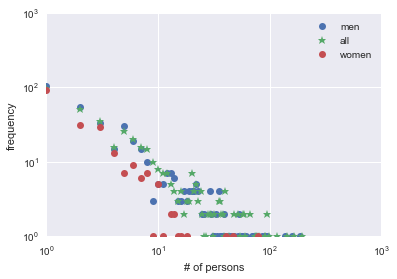

In [5]:
from itertools import groupby
freq_f = {key:len(list(group)) for key, group in groupby(np.sort(df.female_all_amount.values))}
print freq_f
freq_m = {key:len(list(group)) for key, group in groupby(np.sort(df.male_all_amount.values))}
print freq_m
freq_all = {key:len(list(group)) for key, group in groupby(np.sort(df.f_m_all_amount.values))}
print freq_all
df_fr = pd.DataFrame(data={'x': freq_m.keys(), 'men': freq_m.values()})
df_fr_f = pd.DataFrame(data={'x': freq_f.keys(), 'women': freq_f.values()})
df_fr_all = pd.DataFrame(data={'x': freq_all.keys(), 'all': freq_all.values()})
f, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
plt.plot(df_fr.x,df_fr.men,"o")

plt.plot(df_fr_all.x,df_fr_all['all'],marker="*",markersize=9,linestyle = '')
plt.plot(df_fr_f.x,df_fr_f.women,"o")
plt.xlabel("# of persons")
plt.ylabel("frequency")
plt.legend()
plt.show()

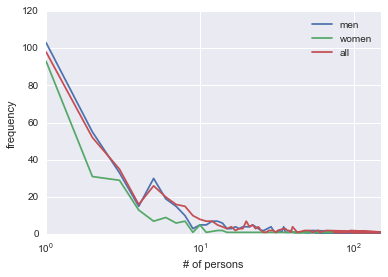

In [7]:
plt.plot(df_fr.x,df_fr.men,label="men")
plt.plot(df_fr_f.x,df_fr_f.women,label="women")
plt.plot(df_fr_all.x,df_fr_all["all"],label="all")
plt.xlim(1,150)
plt.ylim(0,120)
plt.xscale("log")
plt.xlabel("# of persons")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [8]:
#ax = sns.countplot(x="female_all_amount", data=df,order=df.female_all_amount.values.sort())
#ax = sns.countplot(x="male_all_amount", data=df,order=df.male_all_amount.values.sort())

# CCD plots

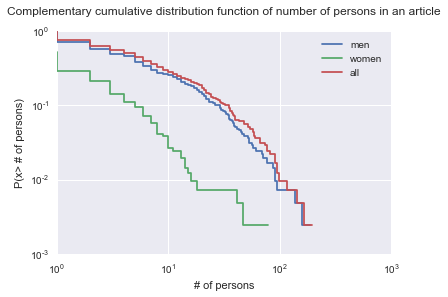

In [224]:
pyplot.xlabel('# of persons')
pyplot.ylabel('P(x> # of persons)')
pyplot.title('Complementary cumulative distribution function of number of persons in an article\n')

data_sorted = np.sort(df.male_all_amount.values)
# calculate the proportional values of samples
p = 1-1. * np.arange(len(df.male_all_amount.values)) / (len(df.male_all_amount.values) )
plt.loglog(data_sorted, p,drawstyle='steps',label="men")
data_sorted_f = np.sort(df.female_all_amount.values)
p_f = 1-1. * np.arange(len(df.female_all_amount.values)) / (len(df.female_all_amount.values))
plt.loglog(data_sorted_f, p_f,drawstyle='steps',label="women")
data_sorted_all = np.sort(df.f_m_all_amount.values)
p_all = 1-1. * np.arange(len(df.f_m_all_amount.values)) / (len(df.f_m_all_amount.values) )
plt.loglog(data_sorted_all, p_all,drawstyle='steps',label="all")
plt.legend()
plt.show()

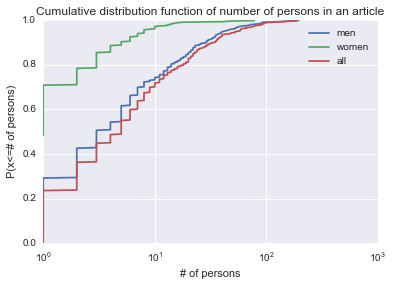

In [358]:
pyplot.xlabel('# of persons')
pyplot.ylabel('P(x<=# of persons)')
pyplot.title('Cumulative distribution function of number of persons in an article')

data_sorted = np.sort(df.male_all_amount.values)
# calculate the proportional values of samples
p = 1. * np.arange(len(df.male_all_amount.values)) / (len(df.male_all_amount.values) )
plt.plot(data_sorted, p,label="men")#,drawstyle='steps')
#plt.loglog(data_sorted, p,drawstyle='steps',label="men")
plt.xscale("log")
data_sorted_f = np.sort(df.female_all_amount.values)
p_f = 1. * np.arange(len(df.female_all_amount.values)) / (len(df.female_all_amount.values) )
plt.plot(data_sorted_f, p_f,label="women")#,drawstyle='steps')
data_sorted_all = np.sort(df.f_m_all_amount.values)
p_all = 1. * np.arange(len(df.f_m_all_amount.values)) / (len(df.f_m_all_amount.values))
plt.plot(data_sorted_all, p_all,label="all")#,drawstyle='steps')
plt.legend()
plt.ylim(0)
plt.show()

# Boxplots with amounts of mentioned people and ratio of men in article 

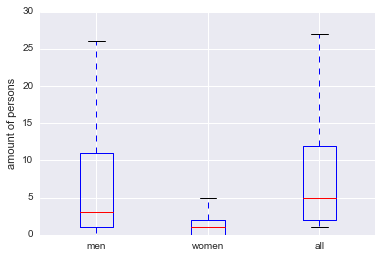

Mean of male person ratio:  0.827957377247
Medean of male person ratio:  0.973684210526


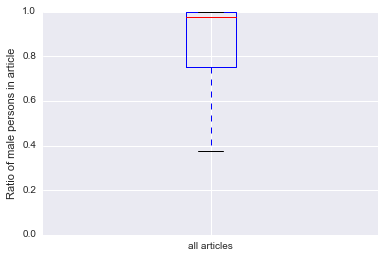

In [3]:
g=df.boxplot(return_type='axes',column=["male_all_amount","female_all_amount","f_m_all_amount"])
plt.ylim(0,30)
plt.xticks([1,2,3],["men","women","all"])
plt.ylabel("amount of persons")
plt.show()

df.loc[:,"m_normalized"]=df.apply(lambda x:float(x["male_all_amount"])/float(x["male_all_amount"]+x["female_all_amount"]),axis=1)
print "Mean of male person ratio: ",df.m_normalized.mean()
print "Medean of male person ratio: ",df.m_normalized.median()
g=df.boxplot(column="m_normalized", return_type="axes")
plt.xticks([1],["all articles"])
plt.ylabel("Ratio of male persons in article")
plt.show()


# Correlation between ratio of men and percentage of women in labor market

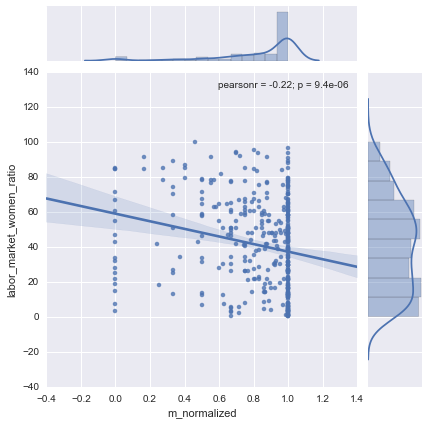

In [80]:
g=sns.jointplot(x="m_normalized", y="labor_market_women_ratio", kind="reg",data=df)

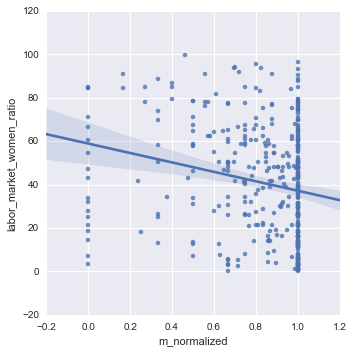

In [81]:
sns.lmplot(x="m_normalized", y="labor_market_women_ratio", data=df)#, robust=True)

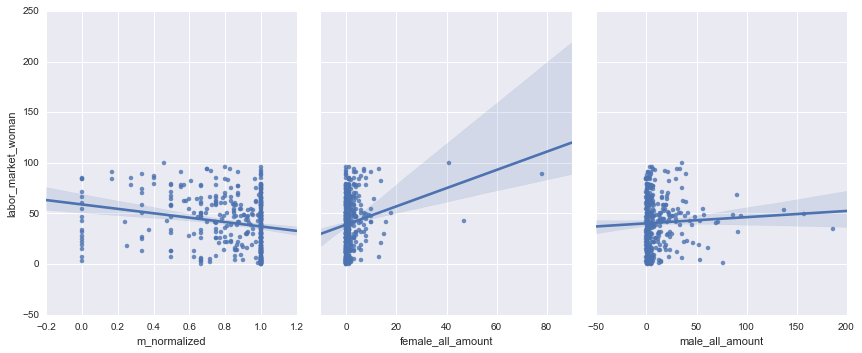

In [32]:
#Correlation between percentage of women in labor market and: 1)ratio of men, 2)amount of women,3)amount of men
sns.pairplot(df, x_vars=["m_normalized", "female_all_amount","male_all_amount"], 
             y_vars=["labor_market_women_ratio"], size=5, aspect=.8, kind="reg")

(-0.05, 200)

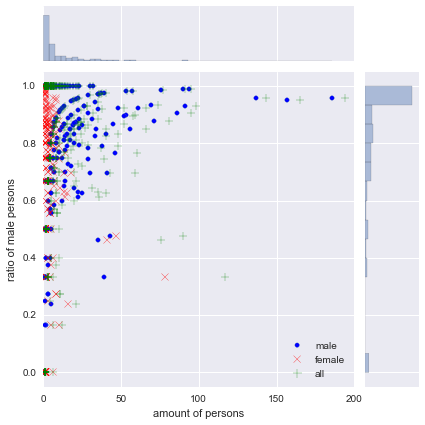

In [21]:
#plot ratios of mentioned men and amount of mentioned men/women/people
graph=sns.jointplot(x="male_all_amount",c='b',  y="m_normalized", data=df,label="male")
graph.x = df.female_all_amount
graph.y = df.m_normalized
graph.plot_joint(plt.scatter, marker='x', c='r', s=50,label="female")
#graph.plot_marginals(sns.distplot, kde=False, color="r")
graph.x = df.f_m_all_amount
graph.y = df.m_normalized
graph.plot_joint(plt.scatter, marker='+', c='g', s=80,label="all")
#graph.plot_marginals(sns.distplot, kde=False, color="g")
graph.set_axis_labels(xlabel='amount of persons', ylabel='ratio of male persons')
plt.legend(loc=4)
plt.ylim(-0.05,1.05)
plt.xlim(-0.05,200)

(0, 40)

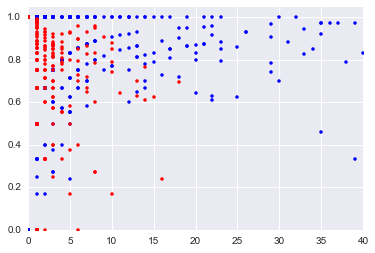

In [166]:
plt.plot(df.male_all_amount.values, df.m_normalized.values,".",c="b")
plt.plot(df.female_all_amount.values, df.m_normalized.values,".",c="r")
#plt.plot(df.f_m_all_amount.values, df.m_normalized.values,".",c="g")
plt.ylim(0,1.05)
plt.xlim(0,40)

In [71]:
#plt.plot(df.male_all_amount.values, df.m_normalized.values,".",c="b",label="men")
#plt.scatter(df.female_all_amount.values, df.m_normalized.values,c="r",marker='x',label="women")#,markersize=9
#plt.scatter(df.f_m_all_amount.values, df.m_normalized.values,c="g",marker='>',label="all")
#plt.ylim(0,1.05)
#plt.xlim(0)
#plt.xlabel("# of persons")
#plt.ylabel("#ratio of male persons")
#plt.legend()
#plt.show()
#df2=df.sort_values(['m_normalized','male_all_amount'], ascending=[False,False])
#plt.plot(df2.male_all_amount.values, df2.m_normalized.values,c="b")
#df2=df.sort_values(['m_normalized','female_all_amount'], ascending=[True,False])
#plt.plot(df2.female_all_amount.values, df2.m_normalized.values,c="r")#,".")
#df2=df.sort_values(['m_normalized','f_m_all_amount'], ascending=[True,False])
#plt.plot(df2.f_m_all_amount.values, df2.m_normalized.values,c="g")
#plt.ylim(0,1.05)
#plt.show()
#df2=df.sort_values(['male_all_amount','m_normalized'], ascending=[True,True])
#plt.plot(df2.male_all_amount.values, df2.m_normalized.values,c="b")
#df2=df.sort_values(['m_normalized','female_all_amount'], ascending=[True,False])
#plt.plot(df2.female_all_amount.values, df2.m_normalized.values,c="r")#,".")
#plt.ylim(0,1.05)
#plt.show()vvvvvvv
#df2=df.sort_values(['male_all_amount','m_normalized'], ascending=[True,True])
#plt.plot(df2.male_all_amount.values, df2.m_normalized.values,c="b")
#df2=df.sort_values(['female_all_amount','m_normalized'], ascending=[True,True])
#plt.plot(df2.female_all_amount.values, df2.m_normalized.values,c="r")
#plt.ylim(0,1.05)
#plt.show()
#df2=df.sort_values(['f_m_all_amount','m_normalized'], ascending=[True,False])
#plt.plot(df2.f_m_all_amount.values, df2.m_normalized.values,c="g")
#plt.ylim(0,1.05)
#plt.show()

# Correlation betwenn labor market data and # of mentioned persons in articles

In [4]:
df_copy=df[["male_all_amount","female_all_amount","f_m_all_amount","m_normalized","labor_market_women_ratio","profession",
            "Bias","prof_gender","labor_market_domin","labor_market_all"]]
df_copy=df_copy.rename(columns = {"male_all_amount":"men","female_all_amount":"women",'f_m_all_amount':'all_persons',
                        "m_normalized":"men_ratio"})
#df_copy["labor_market_men_ratio"]=100-df_copy["labor_market_women_ratio"]
#df_copy["labor_market_dif"]=df_copy["labor_market_men_ratio"]-df_copy["labor_market_women_ratio"]
df_copy["women_ratio"]=1-df_copy["men_ratio"]
df_copy["labor_market_women"]=df_copy["labor_market_women_ratio"]*df_copy["labor_market_all"]/100
df_copy["labor_market_men"]=df_copy["labor_market_all"]-df_copy["labor_market_women"]
df_copy.to_csv('de/all_persons_and_labor_market.csv', sep='\t', encoding='utf-8')
#print pd.isnull(df_copy).sum()
df_copy.dropna(inplace=True)

df_copy.corr(method='pearson')

,men,women,all_persons,men_ratio,labor_market_women_ratio,labor_market_all,women_ratio,labor_market_women,labor_market_men
men,1.000000,0.334531,0.971845,0.109703,0.047029,-0.050531,-0.109703,-0.048210,-0.036104
women,0.334531,1.000000,0.547159,-0.290011,0.194503,0.011871,0.290011,0.048147,-0.032882
all_persons,0.971845,0.547159,1.000000,0.024928,0.090403,-0.041914,-0.024928,-0.030782,-0.040289
men_ratio,0.109703,-0.290011,0.024928,1.000000,-0.218425,-0.213119,-1.000000,-0.232087,-0.119967
labor_market_women_ratio,0.047029,0.194503,0.090403,-0.218425,1.000000,0.081773,0.218425,0.287741,-0.177172
labor_market_all,-0.050531,0.011871,-0.041914,-0.213119,0.081773,1.000000,0.213119,0.860317,0.819803
women_ratio,-0.109703,0.290011,-0.024928,-1.000000,0.218425,0.213119,1.000000,0.232087,0.119967
labor_market_women,-0.048210,0.048147,-0.030782,-0.232087,0.287741,0.860317,0.232087,1.000000,0.413378
labor_market_men,-0.036104,-0.032882,-0.040289,-0.119967,-0.177172,0.819803,0.119967,0.413378,1.000000


C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


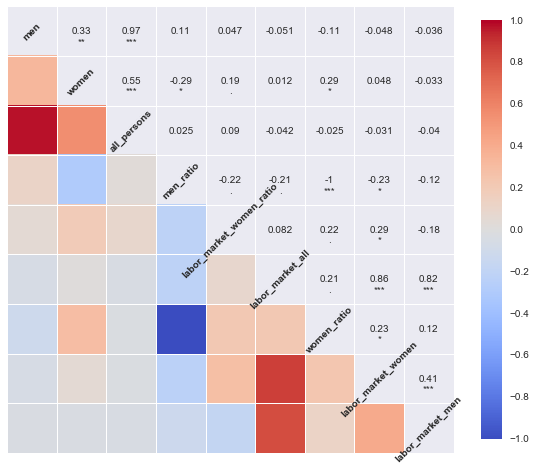

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.corrplot(df_copy)

In [9]:
df_copy.corr(method='spearman')

,men,women,all_persons,men_ratio,labor_market_women_ratio,labor_market_all,labor_market_women,labor_market_men
men,1.000000,0.479205,0.960597,-0.102210,0.104775,-0.204663,-0.149734,-0.226505
women,0.479205,1.000000,0.653736,-0.857348,0.262048,-0.012283,0.087049,-0.079086
all_persons,0.960597,0.653736,1.000000,-0.328456,0.164052,-0.166609,-0.094229,-0.205090
men_ratio,-0.102210,-0.857348,-0.328456,1.000000,-0.271342,-0.079568,-0.170091,-0.010440
labor_market_women_ratio,0.104775,0.262048,0.164052,-0.271342,1.000000,-0.003129,0.391860,-0.238706
labor_market_all,-0.204663,-0.012283,-0.166609,-0.079568,-0.003129,1.000000,0.889259,0.961235
labor_market_women,-0.149734,0.087049,-0.094229,-0.170091,0.391860,0.889259,1.000000,0.767681
labor_market_men,-0.226505,-0.079086,-0.205090,-0.010440,-0.238706,0.961235,0.767681,1.000000


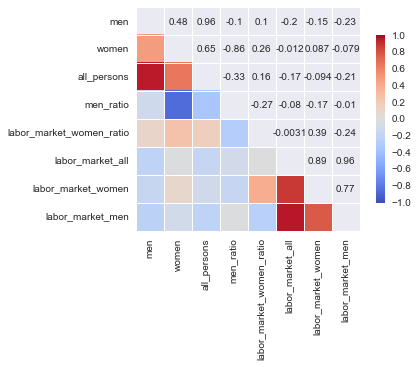

In [10]:
sns.corrplot(df_copy,method="spearman",diag_names=False)

In [8]:
from scipy.stats import spearmanr
df_copy=df_copy[["men","women","all_persons","men_ratio","women_ratio","labor_market_women_ratio",
                 "labor_market_all","labor_market_women","labor_market_men"]]
#construct two arrays, one of the correlation and the other of the p-vals
rho = df_copy.corr(method='spearman')
pval = np.zeros([df_copy.shape[1],df_copy.shape[1]])
pval2=np.zeros([df_copy.shape[1],df_copy.shape[1]])
cor_s=np.zeros([df_copy.shape[1],df_copy.shape[1]])
for i in range(df_copy.shape[1]): # rows are the number of rows in the matrix.
    for j in range(df_copy.shape[1]):
        JonI        = pd.ols(y=df_copy.icol(i), x=df_copy.icol(j), intercept=True)
        pval[i,j]  = JonI.f_stat['p-value']
        pval2[i,j]= spearmanr(df_copy.icol(i),df_copy.icol(j))[1]
        cor_s[i,j]= spearmanr(df_copy.icol(i),df_copy.icol(j))[0]

rho

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]


,men,women,all_persons,men_ratio,women_ratio,labor_market_women_ratio,labor_market_all,labor_market_women,labor_market_men
men,1.000000,0.479205,0.960597,-0.102210,0.102210,0.104775,-0.204663,-0.149734,-0.226505
women,0.479205,1.000000,0.653736,-0.857348,0.857348,0.262048,-0.012283,0.087049,-0.079086
all_persons,0.960597,0.653736,1.000000,-0.328456,0.328456,0.164052,-0.166609,-0.094229,-0.205090
men_ratio,-0.102210,-0.857348,-0.328456,1.000000,-1.000000,-0.271342,-0.079568,-0.170091,-0.010440
women_ratio,0.102210,0.857348,0.328456,-1.000000,1.000000,0.271342,0.079568,0.170091,0.010440
labor_market_women_ratio,0.104775,0.262048,0.164052,-0.271342,0.271342,1.000000,-0.003129,0.391860,-0.238706
labor_market_all,-0.204663,-0.012283,-0.166609,-0.079568,0.079568,-0.003129,1.000000,0.889259,0.961235
labor_market_women,-0.149734,0.087049,-0.094229,-0.170091,0.170091,0.391860,0.889259,1.000000,0.767681
labor_market_men,-0.226505,-0.079086,-0.205090,-0.010440,0.010440,-0.238706,0.961235,0.767681,1.000000


In [9]:
print pval2
df_cor=pd.DataFrame()
df_cor["feature1"]=["men"]*9+["women"]*9+["all_persons"]*9+["men_ratio"]*9+["women_ratio"]*9\
                            +["labor_market_women_ratio"]*9+["labor_market_all"]*9+\
                            ["labor_market_women"]*9+["labor_market_men"]*9
df_cor["feature2"]=["men","women","all_persons","men_ratio","women_ratio","labor_market_women_ratio",
                 "labor_market_all","labor_market_women","labor_market_men"]*9


df_cor["cor"]=cor_s.ravel()
df_cor["pval"]=pval2.ravel()
df_cor["pval2"]=df_cor.pval.apply(lambda x:"***"if x<0.001 else"**"if x<0.01else"*"if x<0.05else "."if x<0.1 else "" ) 
df_cor2=df_cor[(~df_cor.feature1.isin(["labor_market_women_ratio","labor_market_all","labor_market_women",
                               "labor_market_men"]))&(~df_cor.feature2.isin(["men","women","all_persons",
                                                                             "men_ratio","women_ratio"]))]
df_cor2

[[  0.00000000e+000   1.38422043e-024   1.22569629e-225   4.00327176e-002
    4.00327176e-002   3.52711456e-002   3.39978964e-005   2.55021455e-003
    4.25549723e-006]
 [  1.38422043e-024   0.00000000e+000   1.30413434e-050   5.29176189e-118
    5.29176189e-118   9.06874868e-008   8.05578648e-001   8.05410272e-002
    1.12472353e-001]
 [  1.22569629e-225   1.30413434e-050   0.00000000e+000   1.28640697e-011
    1.28640697e-011   9.34143421e-004   7.73965042e-004   5.84486213e-002
    3.27100972e-005]
 [  4.00327176e-002   5.29176189e-118   1.28640697e-011   0.00000000e+000
    0.00000000e+000   3.00218192e-008   1.10291816e-001   5.96428417e-004
    8.34295069e-001]
 [  4.00327176e-002   5.29176189e-118   1.28640697e-011   0.00000000e+000
    0.00000000e+000   3.00218192e-008   1.10291816e-001   5.96428417e-004
    8.34295069e-001]
 [  3.52711456e-002   9.06874868e-008   9.34143421e-004   3.00218192e-008
    3.00218192e-008   0.00000000e+000   9.50014651e-001   2.80635465e-016
    1.2

,feature1,feature2,cor,pval,pval2
5,men,labor_market_women_ratio,0.104775,3.527115e-02,*
6,men,labor_market_all,-0.204663,3.399790e-05,***
7,men,labor_market_women,-0.149734,2.550215e-03,**
8,men,labor_market_men,-0.226505,4.255497e-06,***
14,women,labor_market_women_ratio,0.262048,9.068749e-08,***
15,women,labor_market_all,-0.012283,8.055786e-01,
16,women,labor_market_women,0.087049,8.054103e-02,.
17,women,labor_market_men,-0.079086,1.124724e-01,
23,all_persons,labor_market_women_ratio,0.164052,9.341434e-04,***
24,all_persons,labor_market_all,-0.166609,7.739650e-04,***


In [25]:
#df.corr(method='kendall')

# Plot ratios of mentioned men (violin plot)

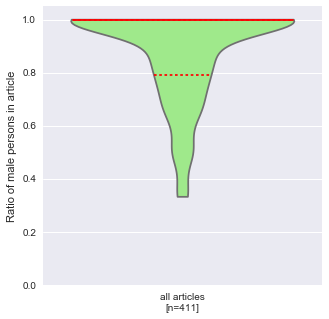

In [27]:
#plt.rcParams['patch.linewidth'] = 0.5  
#plt.rcParams['patch.edgecolor'] = 'black' 
#plt.rcParams['patch.edgecolor'] = 'white' 

def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_df=reject_outliers2(df.m_normalized.values)

plt.figure(figsize=(5,5))
g=sns.violinplot(data=dff_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["light green"]])

plt.xticks([0],["all articles\n[n="+str(len(df))+"]"])

plt.ylabel("Ratio of male persons in article")
plt.ylim(0,1.05)
#plt.gcf().subplots_adjust(bottom=0.15, top=0.99)
plt.savefig("de/plots/violin_all_without_dots.png",dpi=500)
plt.show()

In [20]:
100*float(len(dff_df[dff_df > 0.5 ]))/len(dff_df)
#100*float(len(dff_df[dff_df > 0.5+0.05 ]))/len(dff_df)
#92.50645994832041

92.50645994832041

In [19]:
100*float(len(dff_df[dff_df < 0.5 ]))/len(dff_df)
#100*float(len(dff_df[dff_df < 0.5-0.05 ]))/len(dff_df)
#3.10077519379845

3.6175710594315245

In [22]:
100*float(len(dff_df[dff_df == 0.5 ]))/len(dff_df)
#100*float(len(dff_df[(dff_df > 0.5-0.05)&(dff_df < 0.5+0.05) ]))/len(dff_df)
#4.392764857881137

3.875968992248062

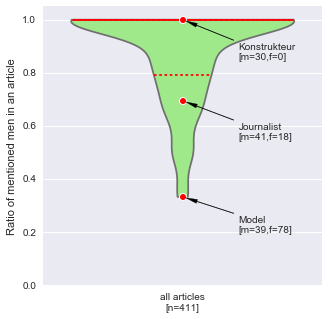

In [12]:
#plt.rcParams['patch.linewidth'] = 0.5  
#plt.rcParams['patch.edgecolor'] = 'black' 
#plt.rcParams['patch.edgecolor'] = 'white' 

def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_df=reject_outliers2(df.m_normalized.values)

plt.figure(figsize=(5,5))
g=sns.violinplot(data=dff_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["light green"]])
sns.stripplot(x=[0,0,0],y=[df.loc["Journalist","m_normalized"],
                    df.loc["Model","m_normalized"],df.loc["Konstrukteur","m_normalized"]],
               c=["r"],palette=[sns.xkcd_rgb["orangered"]])
plt.xticks([0],["all articles\n[n="+str(len(df))+"]"])
plt.annotate('Journalist\n[m=41,f=18]', xy=(0, df.loc["Journalist","m_normalized"]), xytext=(0.2, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Model\n[m=39,f=78]', xy=(0, df.loc["Model","m_normalized"]), xytext=(0.2, 0.2),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Konstrukteur\n[m=30,f=0]', xy=(0, df.loc["Konstrukteur","m_normalized"]), xytext=(0.2, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))

plt.ylabel("Ratio of mentioned men in an article")
plt.ylim(0,1.05)
#plt.gcf().subplots_adjust(bottom=0.15, top=0.99)
plt.savefig("de/plots/violin_all.png",dpi=500, bbox_inches='tight')
plt.show()

# Part 2

## Group by redirection bias

Bias
female       2
male       371
neutral     38
dtype: int64
Median: 
female     0.230263
male       0.989011
neutral    0.834821
Name: m_normalized, dtype: float64


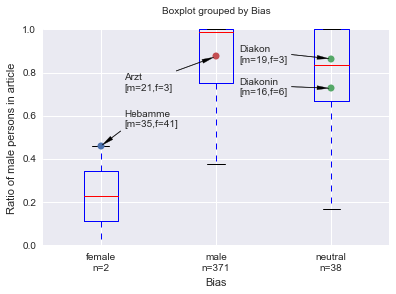

In [13]:
#data=pd.read_csv("de/wiki/all_wiki_pages.csv",sep='\t', encoding='utf-8',index_col=0) 
#df["Bias"]=df.apply(lambda x: data[data.WikiName.isin([x.name])].Bias.values[0], axis =1)
print df.groupby("Bias").size()
medians=df.groupby("Bias").m_normalized.median()
medians.keys().rename("",inplace=True)
print "Median:", medians
df.boxplot(by='Bias',column="m_normalized",bootstrap=200000, return_type="axes")#notch=True
plt.ylabel("Ratio of male persons in article")
plt.title("")
plt.ylim(0,1)
plt.plot([1],[df.loc["Hebamme","m_normalized"]], 'o')
plt.annotate('Hebamme\n[m=35,f=41]', xy=(1, 0.46), xytext=(1.2, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([3,3],[df.loc["Diakon","m_normalized"],df.loc["Diakonin","m_normalized"]], 'o') 
plt.annotate('Diakon\n[m=19,f=3]', xy=(3, df.loc["Diakon","m_normalized"]), xytext=(2.2, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.annotate('Diakonin\n[m=16,f=6]', xy=(3, df.loc["Diakonin","m_normalized"]), xytext=(2.2, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.plot([2],[df.loc["Arzt","m_normalized"]], 'o') 
plt.annotate('Arzt\n[m=21,f=3]', xy=(2, df.loc["Arzt","m_normalized"]), xytext=(1.2, 0.72),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.xticks(range(1,4),["female\nn=2","male\nn=371","neutral\nn=38"])
plt.show()

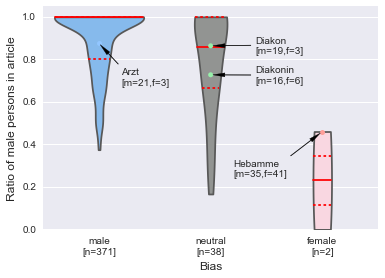

In [7]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_m=reject_outliers2(df[df.Bias=="male"].m_normalized.values)
dff_f=reject_outliers2(df[df.Bias=="female"].m_normalized.values)
dff_n=reject_outliers2(df[df.Bias=="neutral"].m_normalized.values)
df_df = pd.DataFrame({'m_normalized':np.append(dff_m,values=np.append(dff_f,dff_n)),
                      'Bias':["male"]*len(dff_m)+["female"]*len(dff_f)+["neutral"]*len(dff_n)})


with sns.color_palette("pastel", 3):#Set2
    g=sns.violinplot(y="m_normalized",x="Bias",order=["male","neutral","female"],
                   data=df_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["sky blue"],
                                        sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])#,inner="box")
    sns.stripplot(x=["male","neutral","neutral","female"],y=[df.loc["Arzt","m_normalized"],
                    df.loc["Diakon","m_normalized"],df.loc["Diakonin","m_normalized"],df.loc["Hebamme","m_normalized"]],
                 c=["r","r"])
    plt.annotate('Hebamme\n[m=35,f=41]', xy=(2, 0.46), xytext=(1.2, 0.25),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Diakon\n[m=19,f=3]',xy=(1,df.loc["Diakon","m_normalized"]),xytext=(1.4,0.83),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Diakonin\n[m=16,f=6]',xy=(1, df.loc["Diakonin","m_normalized"]), xytext=(1.4, 0.69),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Arzt\n[m=21,f=3]', xy=(0, df.loc["Arzt","m_normalized"]), xytext=(0.2, 0.68),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.ylim(0,1.05)
    plt.ylabel("Ratio of male persons in article",fontsize=12)
    plt.xlabel("Bias", fontsize=12)
    plt.xticks(range(0,3),["male\n[n=371]","neutral\n[n=38]","female\n[n=2]"])
    plt.show()

#Wilcoxon-Mann-Whitney Rank Sum Test

null hypothesis: two sets of measurements are drawn from the same distribution

the alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample. 

In [97]:
from scipy import stats  

m_val=df[df.Bias=="male"].m_normalized.values
f_val=df[df.Bias=="female"].m_normalized.values
n_val=df[df.Bias=="neutral"].m_normalized.values
p_all=[]
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(m_val, n_val)   
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(n_val,f_val)   
print "MWW RankSum P for neutral and female distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
names_c=["male bias professions & female bias professions","male bias professions & nuetral professions",
         "neutral professions & female bias professions"]


from statsmodels.sandbox.stats.multicomp import multipletests

print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "================ pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

MWW RankSum P for male and female distributions = 0.0278333881087 z_stat= 2.19962674404
MWW RankSum P for male and neutral distributions = 0.0797603410988 z_stat= 1.75207832297
MWW RankSum P for neutral and female distributions = 0.054383172481 z_stat= 1.9237719688
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
================ pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male bias professions & female bias professions    False   7.98e-02
male bias professions & nuetral professions        False   7.98e-02
neutral professions & female bias professions      False   7.98e-02


### Wilcoxon-Mann-Whitney Rank Sum Test
| | p-val_old | z | p_val_corr | reject |
| :-|:-:|:-:|:-:|:-:|
| male bias professions & female bias professions|    0.027   |   2.19   | 7.98e-02 | False |
| male bias professions & nuetral professions   |    0.079    |   1.75   | 7.98e-02 | False |
| female bias professions & neutral professions |    0.054    |   1.92   | 7.98e-02 | False|

In [98]:
p_all=[]
print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, f_val)
p_all.append(p_val)
print stats.ks_2samp(m_val, n_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, n_val)
p_all.append(p_val)
print stats.ks_2samp(n_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(n_val, f_val)
p_all.append(p_val)
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]

from statsmodels.sandbox.stats.multicomp import multipletests

print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

Ks_2sampResult(statistic=0.92183288409703501, pvalue=0.024635779823533321)
Ks_2sampResult(statistic=0.19605617818130228, pvalue=0.12447089250670175)
Ks_2sampResult(statistic=0.84210526315789469, pvalue=0.058457910412402385)
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions              False   7.39e-02
male professions & nuetral professions             False   1.24e-01
neutral professions & female professions           False   8.77e-02


In [99]:
#WMW two-sided (my function) 
from scipy.stats._rank import rankdata, tiecorrect
from scipy.stats import distributions
def wmw(x,y,use_continuity=True,alternative ="two-sided"):
    x,y = map(np.asarray, (x, y))
    n1 = len(x)
    n2 = len(y)
    alldata = np.concatenate((x,y))
    ranked = stats._rank.rankdata(alldata)
    rankx = ranked[0:n1] 
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0) 
    u2 = n1*n2 - u1 # remainder is U for
    T = tiecorrect(ranked)
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)
    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    if alternative == 'less':
            z = u1 - meanrank
    elif alternative == 'greater':
            z = u2 - meanrank
    elif alternative == 'two-sided':
            bigu = max(u1, u2)
            z = np.abs(bigu - meanrank)

    else:
            raise ValueError("alternative should be 'less', 'greater'"
                             "or 'two-sided'")

    z = z / sd

    print z,u2, distributions.norm.sf(z) * 2
    return z,u2,distributions.norm.sf(z) * 2

p_all=[]
p_all.append(wmw(m_val,f_val)[2])
p_all.append(wmw(m_val,n_val)[2])
p_all.append(wmw(n_val,f_val)[2])
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

2.34167766553 705.5 0.0191972865815
1.86217656331 8265.0 0.0625782068116
1.94672546966 69.0 0.0515676564093
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions              False   5.76e-02
male professions & nuetral professions             False   6.26e-02
neutral professions & female professions           False   6.26e-02


## Group by gender of profession label

prof_gender
female      11
male       376
neutral     24
dtype: int64
Median: 
female     0.666667
male       0.988012
neutral    0.834821
Name: m_normalized, dtype: float64


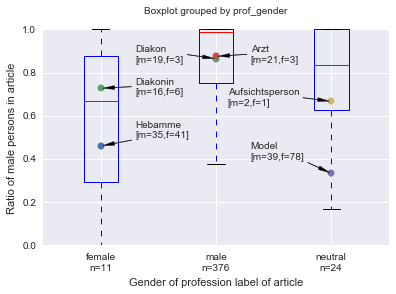

In [14]:
print df.groupby("prof_gender").size()
medians=df.groupby("prof_gender").m_normalized.median()
medians.keys().rename("",inplace=True)
print "Median:", medians
g=df.boxplot(column="m_normalized",by="prof_gender",return_type='axes')#showmeans=True,ntch=True
plt.title("")
plt.ylabel("Ratio of male persons in article")
plt.xlabel("Gender of profession label of article")
plt.plot([1],[df.loc["Hebamme","m_normalized"]], 'o') 
plt.annotate('Hebamme\n[m=35,f=41]', xy=(1, 0.46), xytext=(1.3, 0.5),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([2,1],[df.loc["Diakon","m_normalized"],df.loc["Diakonin","m_normalized"]], 'o') 
plt.annotate('Diakon\n[m=19,f=3]', xy=(2, df.loc["Diakon","m_normalized"]), xytext=(1.3, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.annotate('Diakonin\n[m=16,f=6]', xy=(1, df.loc["Diakonin","m_normalized"]), xytext=(1.3, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.plot([2],[df.loc["Arzt","m_normalized"]], 'o') 
plt.annotate('Arzt\n[m=21,f=3]', xy=(2, df.loc["Arzt","m_normalized"]), xytext=(2.3, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([3],[df.loc["Model","m_normalized"]], 'o') 
plt.annotate('Model\n[m=39,f=78]', xy=(3, df.loc["Model","m_normalized"]), xytext=(2.3, 0.4),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([3],[df.loc["Aufsichtsperson","m_normalized"]], 'o') 
plt.annotate('Aufsichtsperson\n[m=2,f=1]', xy=(3, df.loc["Aufsichtsperson","m_normalized"]), xytext=(2.1, 0.65),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.xticks(range(1,4),["female\nn=11","male\nn=376","neutral\nn=24"])
plt.show()

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


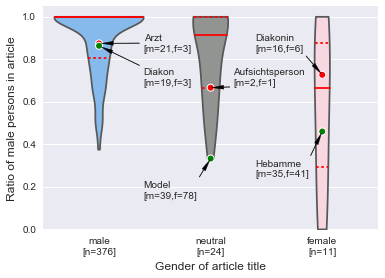

In [23]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_m=reject_outliers2(df[df.prof_gender=="male"].m_normalized.values)
dff_f=reject_outliers2(df[df.prof_gender=="female"].m_normalized.values)
dff_n=reject_outliers2(df[df.prof_gender=="neutral"].m_normalized.values)
df_df = pd.DataFrame({'m_normalized':np.append(dff_m,values=np.append(dff_f,dff_n)),
                      'prof_gender':["male"]*len(dff_m)+["female"]*len(dff_f)+["neutral"]*len(dff_n)})


with sns.color_palette("pastel", 3):#Set2
    g=sns.violinplot(y="m_normalized",x="prof_gender",order=["male","neutral","female"],
                   data=df_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["sky blue"],
                    sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])#,inner="box")
    sns.stripplot(x=["male","male","neutral","neutral","female","female"],y=[df.loc["Arzt","m_normalized"],
                    df.loc["Diakon","m_normalized"],df.loc["Aufsichtsperson","m_normalized"],df.loc["Model","m_normalized"],
                    df.loc["Diakonin","m_normalized"],df.loc["Hebamme","m_normalized"]],
                 c=["r","g","r","r","r","r"])
    plt.annotate('Hebamme\n[m=35,f=41]', xy=(2, 0.46), xytext=(1.4, 0.25),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Diakon\n[m=19,f=3]',xy=(0,df.loc["Diakon","m_normalized"]),xytext=(0.4,0.68),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Diakonin\n[m=16,f=6]',xy=(2, df.loc["Diakonin","m_normalized"]), xytext=(1.4, 0.84),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Arzt\n[m=21,f=3]', xy=(0, df.loc["Arzt","m_normalized"]), xytext=(0.4, 0.84),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Model\n[m=39,f=78]', xy=(1, df.loc["Model","m_normalized"]), xytext=(0.4, 0.15),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Aufsichtsperson\n[m=2,f=1]', xy=(1, df.loc["Aufsichtsperson","m_normalized"]), xytext=(1.2, 0.68),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.ylim(0,1.05)

    plt.ylabel("Ratio of male persons in article",fontsize=12)
    plt.xlabel("Gender of article title", fontsize=12)
    plt.xticks(range(0,3),["male\n[n=376]","neutral\n[n=24]","female\n[n=11]"])
    #plt.boxplot(df.m_normalized,data=df,by="prof_gender",return_type='axes')
    plt.show()
    


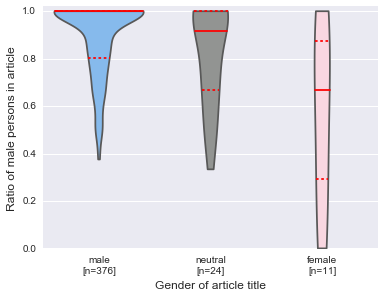

In [24]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_m=reject_outliers2(df[df.prof_gender=="male"].m_normalized.values)
dff_f=reject_outliers2(df[df.prof_gender=="female"].m_normalized.values)
dff_n=reject_outliers2(df[df.prof_gender=="neutral"].m_normalized.values)
df_df = pd.DataFrame({'m_normalized':np.append(dff_m,values=np.append(dff_f,dff_n)),
                      'prof_gender':["male"]*len(dff_m)+["female"]*len(dff_f)+["neutral"]*len(dff_n)})

if True:
#with sns.color_palette("pastel", 3):#Set2
    g=sns.violinplot(y="m_normalized",x="prof_gender",order=["male","neutral","female"],
                   data=df_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["sky blue"],
                    sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])#,inner="box")

    plt.ylim(0,1.02)

    plt.ylabel("Ratio of male persons in article",fontsize=12)
    plt.xlabel("Gender of article title", fontsize=12)
    plt.xticks(range(0,3),["male\n[n=376]","neutral\n[n=24]","female\n[n=11]"])
    plt.gcf().subplots_adjust(bottom=0.15, top=0.99)
    plt.savefig("violin_gender_without_dots.png",dpi=500)
    plt.show()

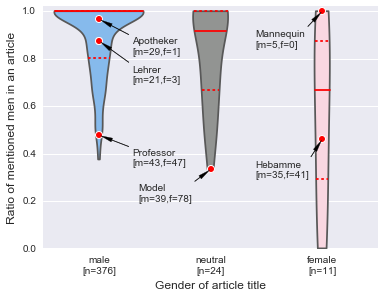

In [15]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_m=reject_outliers2(df[df.prof_gender=="male"].m_normalized.values)
dff_f=reject_outliers2(df[df.prof_gender=="female"].m_normalized.values)
dff_n=reject_outliers2(df[df.prof_gender=="neutral"].m_normalized.values)
df_df = pd.DataFrame({'m_normalized':np.append(dff_m,values=np.append(dff_f,dff_n)),
                      'prof_gender':["male"]*len(dff_m)+["female"]*len(dff_f)+["neutral"]*len(dff_n)})

if True:
#with sns.color_palette("pastel", 3):#Set2
    g=sns.violinplot(y="m_normalized",x="prof_gender",order=["male","neutral","female"],
                   data=df_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["sky blue"],
                    sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])#,inner="box")
    sns.stripplot(x=["male","male","male","male","neutral",
                     #"neutral","neutral",
                     "female","female"#,"female"
                    ],#,"female"],
                  y=[df.loc["Arzt","m_normalized"],df.loc["Professor","m_normalized"],df.loc["Lehrer","m_normalized"],
        df.loc["Apotheker","m_normalized"],df.loc["Model","m_normalized"],#df.loc["Hilfspolizei","m_normalized"],
        #df.loc["Dekorationsmalerei","m_normalized"],
        df.loc["Hebamme","m_normalized"],#df.loc["Nonne","m_normalized"],
        df.loc["Mannequin","m_normalized"]#,df.loc["Gleichstellungsbeauftragte","m_normalized"]
                    ],
        c=["r"],palette=[sns.xkcd_rgb["orangered"]])

    #plt.annotate('Arzt\n[m=21,f=3]', xy=(0, df.loc["Arzt","m_normalized"]), xytext=(0.25, 0.7),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Apotheker\n[m=29,f=1]', xy=(0, df.loc["Apotheker","m_normalized"]), xytext=(0.3, 0.82),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Professor\n[m=43,f=47]', xy=(0, df.loc["Professor","m_normalized"]), xytext=(0.3, 0.35),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Lehrer\n[m=21,f=3]', xy=(0, df.loc["Lehrer","m_normalized"]), xytext=(0.3, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Model\n[m=39,f=78]', xy=(1, df.loc["Model","m_normalized"]), xytext=(0.35, 0.2),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Dekorationsmalerei\n[m=15,f=0]', xy=(1, df.loc["Dekorationsmalerei","m_normalized"]), xytext=(1.15, 0.7),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Hilfspolizei\n[m=13,f=3]', xy=(1, df.loc["Hilfspolizei","m_normalized"]), xytext=(1.15, 0.5),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Aufsichtsperson\n[m=2,f=1]', xy=(1, df.loc["Aufsichtsperson","m_normalized"]), xytext=(1.2, 0.68),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))

    plt.annotate('Mannequin\n[m=5,f=0]', xy=(2, df.loc["Mannequin","m_normalized"]), xytext=(1.4, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Hebamme\n[m=35,f=41]', xy=(2, 0.46), xytext=(1.4, 0.3),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Nonne\n[m=5,f=0]', xy=(2, df.loc["Nonne","m_normalized"]), xytext=(1.4, 0.5),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))

    #plt.annotate('Gleichstellungsbeauftragte\n[m=0,f=6]', xy=(2, df.loc["Gleichstellungsbeauftragte","m_normalized"]),
    #             xytext=(1.78, 0.075),arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'),
    #            horizontalalignment='right')
    plt.ylim(0,1.02)

    plt.ylabel("Ratio of mentioned men in an article",fontsize=12)
    plt.xlabel("Gender of article title", fontsize=12)
    plt.xticks(range(0,3),["male\n[n=376]","neutral\n[n=24]","female\n[n=11]"])
    plt.gcf().subplots_adjust(bottom=0.15, top=0.99)
    plt.savefig("violin_gender.png",dpi=500)
    plt.savefig("de/plots/violin_gender.png",dpi=500, bbox_inches='tight')
    plt.show()

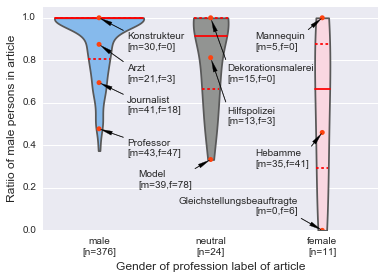

In [7]:
if True:
#with sns.color_palette("pastel", 3):#Set2
    g=sns.violinplot(y="m_normalized",x="prof_gender",order=["male","neutral","female"],
                   data=df_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["sky blue"],
                    sns.xkcd_rgb["grey"],sns.xkcd_rgb["light pink"]])#,inner="box")
    sns.stripplot(x=["male","male","male","male","neutral","neutral","neutral","female","female","female"],#,"female"],
                  y=[df.loc["Arzt","m_normalized"],df.loc["Professor","m_normalized"],df.loc["Journalist","m_normalized"],
        df.loc["Konstrukteur","m_normalized"],df.loc["Model","m_normalized"],df.loc["Hilfspolizei","m_normalized"],
        df.loc["Dekorationsmalerei","m_normalized"],df.loc["Hebamme","m_normalized"],#df.loc["Nonne","m_normalized"],
        df.loc["Mannequin","m_normalized"],df.loc["Gleichstellungsbeauftragte","m_normalized"]],
        c=["r"],palette=[sns.xkcd_rgb["orangered"]])

    plt.annotate('Arzt\n[m=21,f=3]', xy=(0, df.loc["Arzt","m_normalized"]), xytext=(0.25, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Konstrukteur\n[m=30,f=0]', xy=(0, df.loc["Konstrukteur","m_normalized"]), xytext=(0.25, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Professor\n[m=43,f=47]', xy=(0, df.loc["Professor","m_normalized"]), xytext=(0.25, 0.35),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Journalist\n[m=41,f=18]', xy=(0, df.loc["Journalist","m_normalized"]), xytext=(0.25, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Model\n[m=39,f=78]', xy=(1, df.loc["Model","m_normalized"]), xytext=(0.35, 0.2),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Dekorationsmalerei\n[m=15,f=0]', xy=(1, df.loc["Dekorationsmalerei","m_normalized"]), xytext=(1.15, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Hilfspolizei\n[m=13,f=3]', xy=(1, df.loc["Hilfspolizei","m_normalized"]), xytext=(1.15, 0.5),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Aufsichtsperson\n[m=2,f=1]', xy=(1, df.loc["Aufsichtsperson","m_normalized"]), xytext=(1.2, 0.68),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))

    plt.annotate('Mannequin\n[m=5,f=0]', xy=(2, df.loc["Mannequin","m_normalized"]), xytext=(1.4, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Hebamme\n[m=35,f=41]', xy=(2, 0.46), xytext=(1.4, 0.3),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Nonne\n[m=5,f=0]', xy=(2, df.loc["Nonne","m_normalized"]), xytext=(1.4, 0.5),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))

    plt.annotate('Gleichstellungsbeauftragte\n[m=0,f=6]', xy=(2, df.loc["Gleichstellungsbeauftragte","m_normalized"]),
                 xytext=(1.78, 0.075),arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'),
                horizontalalignment='right')
    plt.ylim(0,1.05)

    plt.ylabel("Ratio of male persons in article",fontsize=12)
    plt.xlabel("Gender of profession label of article", fontsize=12)
    plt.xticks(range(0,3),["male\n[n=376]","neutral\n[n=24]","female\n[n=11]"])
    plt.show()

### MWW Ranksum tests

In [90]:
from scipy import stats  

m_val=df[df.prof_gender=="male"].m_normalized.values
f_val=df[df.prof_gender=="female"].m_normalized.values
n_val=df[df.prof_gender=="neutral"].m_normalized.values
p_all=[]
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(m_val, n_val)   
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(n_val, f_val)   
print "MWW RankSum P for female and neutral distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]

from statsmodels.sandbox.stats.multicomp import multipletests

print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

MWW RankSum P for male and female distributions = 0.0137464452259 z_stat= 2.46382175804
MWW RankSum P for male and neutral distributions = 0.195718220482 z_stat= 1.29384715635
MWW RankSum P for female and neutral distributions = 0.150120822242 z_stat= 1.4391048354
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions               True   2.75e-02
male professions & nuetral professions             False   1.30e-01
neutral professions & female professions           False   1.30e-01


### Wilcoxon-Mann-Whitney Rank Sum Test
| | p-val_old | z | p_val_corr | reject |
| :-|:-:|:-:|:-:|:-:|
| male professions & female professions    |    0.013     |   2.46    | 2.75e-02 | True  |
| male professions & nuetral professions   |    0.195     |   1.29    | 1.30e-01 | False |
| female professions & neutral professions |     0.15     |   1.43    | 1.30e-01 | False |

In [91]:
p_all=[]
print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, f_val)
p_all.append(p_val)
print stats.ks_2samp(m_val, n_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, n_val)
p_all.append(p_val)
print stats.ks_2samp(n_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(n_val, f_val)
p_all.append(p_val)
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

Ks_2sampResult(statistic=0.4719535783365571, pvalue=0.010825001414974974)
Ks_2sampResult(statistic=0.19414893617021278, pvalue=0.32754619434475996)
Ks_2sampResult(statistic=0.32954545454545453, pvalue=0.31798377545626783)
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions               True   2.17e-02
male professions & nuetral professions             False   2.18e-01
neutral professions & female professions           False   2.18e-01


In [92]:
print stats.mannwhitneyu(m_val, f_val,alternative='two-sided')

0.16.0
MannwhitneyuResult(statistic=1167.0, pvalue=0.004394681527867348)


In [79]:
print stats.kruskal(m_val, f_val, n_val)
print stats.combine_pvalues(p_all, method='fisher')#Fisher's method (also known as Fisher's combined probability test)

KruskalResult(statistic=8.4922090113144755, pvalue=0.01431990852115936)
(15.628738299161324, 0.015891660428074449)


In [85]:
p_all=[]
p_all.append(wmw(m_val,f_val)[2])
p_all.append(wmw(m_val,n_val)[2])
p_all.append(wmw(n_val,f_val)[2])
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

2969.0 0.00878936305573
5222.5 0.168619710413
172.5 0.143967926958
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions               True   1.76e-02
male professions & nuetral professions             False   1.12e-01
neutral professions & female professions           False   1.12e-01


# Part 3

## Group by Labor market

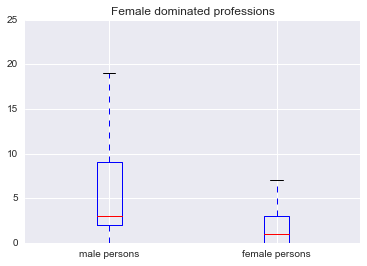

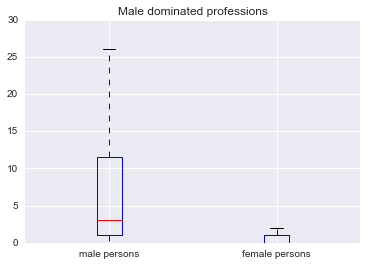

In [16]:
female_most_people=df[df.labor_market_domin=="female"]
male_most_people=df[df.labor_market_domin=="male"]

g=female_most_people.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,25)
plt.xticks([1,2],["male persons","female persons"])
plt.title("Female dominated professions")
plt.show()

g=male_most_people.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,30)
plt.xticks([1,2],["male persons","female persons"])
plt.title("Male dominated professions")
plt.show()

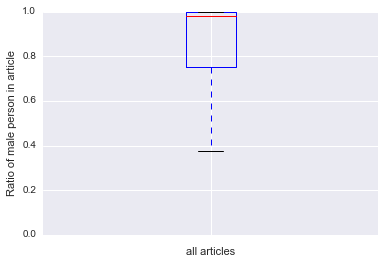

Ratio of male persons in all articles (mean): 0.827989756752


In [17]:
#only data where we have labour market statistics
df_all=df[~df.labor_market_domin.isnull()]

df_all.boxplot(column="m_normalized",return_type='axes')
plt.xlabel("all articles")
plt.xticks([1],"")
plt.ylabel("Ratio of male person in article")
plt.show()
print "Ratio of male persons in all articles (mean):",df_all.m_normalized.mean()

labor_market_domin
female    153
male      251
dtype: int64
Median: 
female    0.85
male      1.00
Name: m_normalized, dtype: float64
Ratio of male persons in articles about female dominated profesion(mean): 0.768219758851
Ratio of male persons in articles about male dominated profesion(mean): 0.864423261448


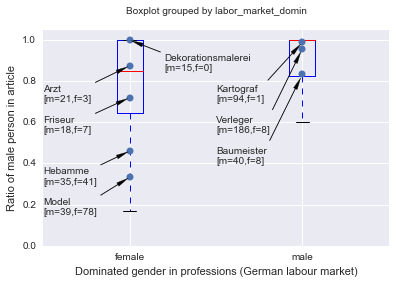

In [18]:
print df_all.groupby("labor_market_domin").size()
medians=df.groupby("labor_market_domin").m_normalized.median()
medians.keys().rename("",inplace=True)
print "Median:", medians
g_b_m=df_all.boxplot(column="m_normalized",return_type='axes',by="labor_market_domin")
plt.plot([1]*5+[2]*3,[df.loc["Hebamme","m_normalized"],df.loc["Model","m_normalized"],
               df.loc["Dekorationsmalerei","m_normalized"],df.loc["Arzt","m_normalized"],
               df.loc["Friseur","m_normalized"],df.loc["Kartograf","m_normalized"],
               df.loc["Verleger","m_normalized"],df.loc["Baumeister","m_normalized"]], 'o') 

plt.annotate('Arzt\n[m=21,f=3]', xy=(1, df.loc["Arzt","m_normalized"]), xytext=(0.5, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Model\n[m=39,f=78]', xy=(1, df.loc["Model","m_normalized"]), xytext=(0.5, 0.15),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Dekorationsmalerei\n[m=15,f=0]', xy=(1, df.loc["Dekorationsmalerei","m_normalized"]), xytext=(1.2, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Kartograf\n[m=94,f=1]', xy=(2, df.loc["Kartograf","m_normalized"]), xytext=(1.5, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Verleger\n[m=186,f=8]', xy=(2, df.loc["Verleger","m_normalized"]), xytext=(1.5, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Baumeister\n[m=40,f=8]', xy=(2, df.loc["Baumeister","m_normalized"]), xytext=(1.5, 0.4),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Hebamme\n[m=35,f=41]', xy=(1, df.loc["Hebamme","m_normalized"]), xytext=(0.5, 0.3),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.annotate('Friseur\n[m=18,f=7]', xy=(1, df.loc["Friseur","m_normalized"]), xytext=(0.5, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.title("")#"ratio of men in artcles for professions where there are less than 50% female")
plt.xlabel("Dominated gender in professions (German labour market)")
plt.ylabel("Ratio of male person in article")
plt.ylim(0,1.05)
print "Ratio of male persons in articles about female dominated profesion(mean):",df_all[df_all.labor_market_domin=="female"].m_normalized.mean()
print "Ratio of male persons in articles about male dominated profesion(mean):",df_all[df_all.labor_market_domin=="male"].m_normalized.mean()

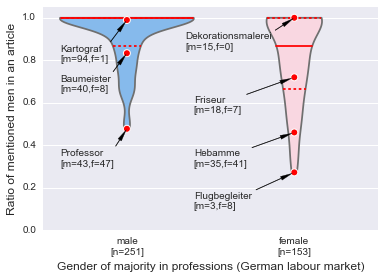

In [20]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_m=reject_outliers2(df[df.labor_market_domin=="male"].m_normalized.values)
dff_f=reject_outliers2(df[df.labor_market_domin=="female"].m_normalized.values)
df_df = pd.DataFrame({'m_normalized':np.append(dff_m,values=dff_f),
                      'labor_market_domin':["male"]*len(dff_m)+["female"]*len(dff_f)})


with sns.color_palette("pastel", 3):#Set2
    g=sns.violinplot(y="m_normalized",x="labor_market_domin",order=["male","female"],
                   data=df_df,cut=0,trim=True,inner="quartile",palette=[sns.xkcd_rgb["sky blue"],
                    sns.xkcd_rgb["light pink"]])#,inner="box")
    sns.stripplot(x=["male","male","male",
                     "female","female","female","female"],#,"female"],#,"female","female"],
                  y=[df.loc["Professor","m_normalized"],
                     df.loc["Kartograf","m_normalized"],
                    df.loc["Baumeister","m_normalized"], #df.loc["Arzt","m_normalized"],
                     df.loc["Dekorationsmalerei","m_normalized"],
                     df.loc["Friseur","m_normalized"],
                    #df.loc["Diakon","m_normalized"],
                     df.loc["Flugbegleiter","m_normalized"],#df.loc["Aufsichtsperson","m_normalized"],
                    #df.loc["Diakonin","m_normalized"],
                     df.loc["Hebamme","m_normalized"]],palette=["r","r","r"],
                 c=["r","r","r","r","r","r","r","r"])
    plt.annotate('Kartograf\n[m=94,f=1]', xy=(0, df.loc["Kartograf","m_normalized"]), xytext=(-0.4, 0.79),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Verleger\n[m=186,f=8]', xy=(0, df.loc["Verleger","m_normalized"]), xytext=(-0.45, 0.7),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Baumeister\n[m=40,f=8]', xy=(0, df.loc["Baumeister","m_normalized"]), xytext=(-0.4, 0.65),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Professor\n[m=43,f=47]', xy=(0, df.loc["Professor","m_normalized"]), xytext=(-0.4, 0.3),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    
    
    plt.annotate('Hebamme\n[m=35,f=41]', xy=(1, df.loc["Hebamme","m_normalized"]), xytext=(0.4, 0.3),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Friseur\n[m=18,f=7]', xy=(1, df.loc["Friseur","m_normalized"]), xytext=(0.4, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Diakon\n[m=19,f=3]',xy=(1,df.loc["Diakon","m_normalized"]),xytext=(0.4,0.68),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Diakonin\n[m=16,f=6]',xy=(1, df.loc["Diakonin","m_normalized"]), xytext=(1.2, 0.84),
    #        arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Arzt\n[m=21,f=3]', xy=(1, df.loc["Arzt","m_normalized"]), xytext=(0.4, 0.7),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    #plt.annotate('Model\n[m=39,f=78]', xy=(1, df.loc["Model","m_normalized"]), xytext=(0.4, 0.15),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    
    plt.annotate('Flugbegleiter\n[m=3,f=8]', xy=(1, df.loc["Flugbegleiter","m_normalized"]), xytext=(0.4, 0.1),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.annotate('Dekorationsmalerei\n[m=15,f=0]', xy=(1, df.loc["Dekorationsmalerei","m_normalized"]), xytext=(0.35, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))

    #plt.annotate('Aufsichtsperson\n[m=2,f=1]', xy=(1, df.loc["Aufsichtsperson","m_normalized"]), xytext=(1.2, 0.68),
    #         arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
    plt.ylim(0,1.05)

    plt.ylabel("Ratio of mentioned men in an article",fontsize=12)
    #plt.xlabel("Dominated gender in professions (German labour market)", fontsize=12)
    plt.xlabel("Gender of majority in professions (German labour market)", fontsize=12)
    plt.xticks(range(0,2),["male\n[n=251]","female\n[n=153]"])
    #plt.boxplot(df.m_normalized,data=df,by="prof_gender",return_type='axes')
    plt.savefig("de/plots/violin_labormarket.png",dpi=500, bbox_inches='tight')
    plt.show()
    


In [26]:
df[(df.labor_market_domin=="female")& (df.m_normalized<0.4)& (df.f_m_all_amount>10)]

,male_links,all_link,lead,text,male_person,female_person,female_links,Bias,prof_gender,labor_market_domin,...,female_polyglot,female,male_polyglot,male_all,female_all,male_all_amount,female_all_amount,labor_market_women_ratio,f_m_all_amount,m_normalized
Au-pair,0,"[Junger_Volljähriger, Staat, Jugendlicher, Fra...",Au-pair [oˈpɛʀ] (Kurzform für „Au-pair-Junge“ ...,Au-pair [oˈpɛʀ] (Kurzform für „Au-pair-Junge“ ...,[],[],0,neutral,neutral,female,...,10,"[Sabine Hess, Ira Dumpe, Tatjana Eggeling, Dan...",2,"[Georg Beckmann, Volker Schmerse]","[Sabine Hess, Ira Dumpe, Tatjana Eggeling, Dan...",2,10,91.017849,12,0.166667
Flugbegleiter,1,"[Aeroflot, CFM56, A320, Englische_Sprache, Ver...",Flugbegleiter (früher auch: Steward oder weibl...,Flugbegleiter (früher auch: Steward oder weibl...,[Ron_Akana],[Nelly_Diener],1,male,male,female,...,8,"[Maria Weckesser, Nelly Diener, Heather Poole,...",3,"[Ingo Matuschek, Ron Akana, Gray]","[Maria Weckesser, Nelly Diener, Heather Poole,...",3,8,78.203365,11,0.272727
Gesundheits- und Krankenpfleger,0,"[Krankenpflegediplom, Pflegefachfrau, Gesundhe...",Der Gesundheits- und Krankenpfleger ist ein Ge...,Der Gesundheits- und Krankenpfleger ist ein Ge...,[],[Transkulturelle_Pflege],1,male,male,female,...,7,"[Angelika, Bärbel Bas, Nicole Menche, Mechthil...",3,"[Urban, Fischer, Manfred Engl]","[Transkulturelle Pflege, Angelika, Bärbel Bas,...",3,8,84.959672,11,0.272727
Model,18,"[Gisele_Bündchen, Laufsteg, Englische_Sprache,...","Als Model (aus dem Englischen, Aussprache mit ...","Als Model (aus dem Englischen, Aussprache mit ...","[Horst_P._Horst, Peter_Lindbergh, Marcus_Schen...","[Gisele_Bündchen, Lisa_Fonssagrives, Dovima, D...",61,neutral,neutral,female,...,70,"[Taylor Fuchs, Alessandra Ambrosio, Karen Muld...",41,"[Horst P Horst, Peter Lindbergh, Marcus Schenk...","[Gisele Bündchen, Lisa Fonssagrives, Suzy Park...",39,78,88.775510,117,0.333333


[]

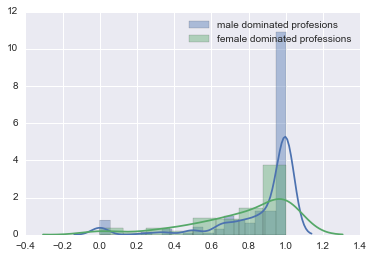

In [93]:
import seaborn as sns
m_val=df_all[df_all.labor_market_domin=="male"].m_normalized.values
f_val=df_all[df_all.labor_market_domin=="female"].m_normalized.values
g1=sns.distplot(m_val,label="male dominated profesions")
g2=sns.distplot(f_val,label="female dominated professions")
g2.legend()
#g2.set_xlim(0,1)
g2.plot()

In [94]:
from scipy import stats  
#(also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
#The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution.
#The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

MWW RankSum P for male and female distributions = 2.65933602087e-05 z_stat= 4.20083393862


### Wilcoxon-Mann-Whitney Rank Sum Test
| | p-val | z |
| :-|:-:|:-:|
| male professions & female professions |    2.66e-05     |   4.20    | 

In [100]:
print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic

Ks_2sampResult(statistic=0.92183288409703501, pvalue=0.024635779823533321)


In [101]:
print stats.mannwhitneyu(m_val, f_val)#one-sided
# Mann-Whitney U test that is two-sided and has continuity cirrection (my implementation, also is right in scipy v0.17)
print wmw(m_val,f_val)

MannwhitneyuResult(statistic=36.5, pvalue=0.0095986432907258206)
2.34167766553 705.5 0.0191972865815
(2.3416776655268881, 705.5, 0.019197286581451641)


(Mann–Whitney U=23984.0, n1=251, n2=153, p=7.89e-06 p<0.05 two-tailed)
    
    A measure of the central tendencies of the two groups (means or medians)
    The value of U
    The sample sizes
    The significance level.


## Distribution visualisation

(0, 200.0)

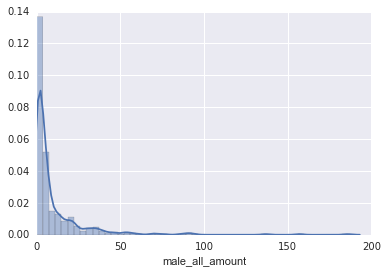

In [27]:
import seaborn as sns
#sns.set(color_codes=True)
g=sns.distplot(df.male_all_amount)
g.set_xlim(0,)

(0, 80.0)

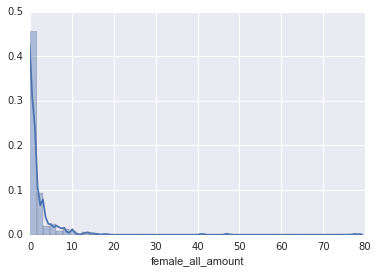

In [28]:
g=sns.distplot(df.female_all_amount)
g.set_xlim(0,)

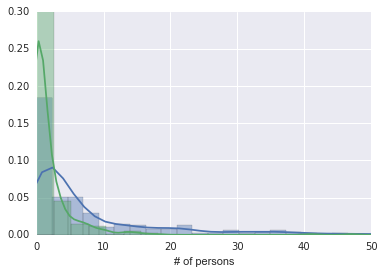

In [29]:
g1=sns.distplot(df.male_all_amount,bins=80)
g2=sns.distplot(df.female_all_amount,bins=30, kde_kws={"bw":1})
g1.set_xlim(0,50)
g1.set_ylim(0,0.3)
g1.set_xlabel("# of persons")

### Comulative distribution

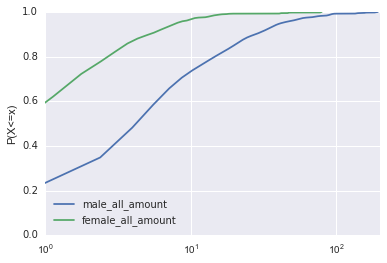

In [30]:
g=sns.kdeplot(df.male_all_amount,cumulative=True)#,linestyle="dotted")
g1=sns.kdeplot(df.female_all_amount,cumulative=True)
#g.set_ylim(1, 0)
g.set_xlim(1,)
g.set_xscale('log')
g.set_ylabel("P(X<=x)")

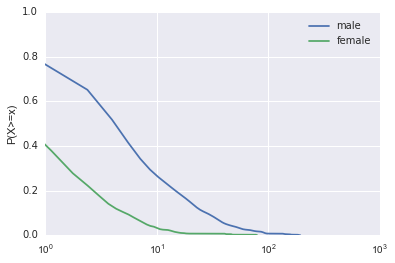

In [31]:
line = g.lines[0]
plt.plot(line.get_xdata(),1-line.get_ydata(), label="male")
line2=g.lines[1]
plt.plot(line2.get_xdata(),1-line2.get_ydata(), label="female")
plt.xscale("log")
plt.xlim(1,)
plt.legend()
plt.ylabel("P(X>=x)")

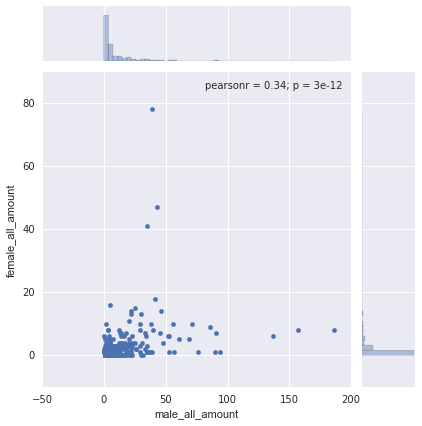

In [32]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount", data=df);

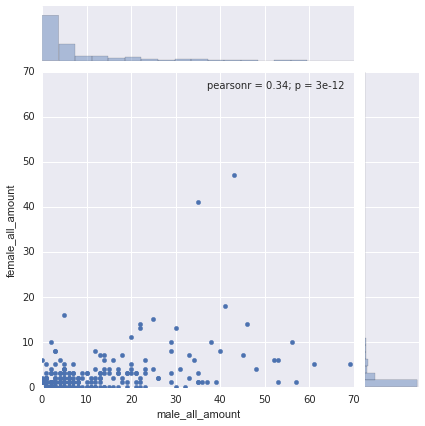

In [33]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, xlim=(0,70), ylim=(0,70))

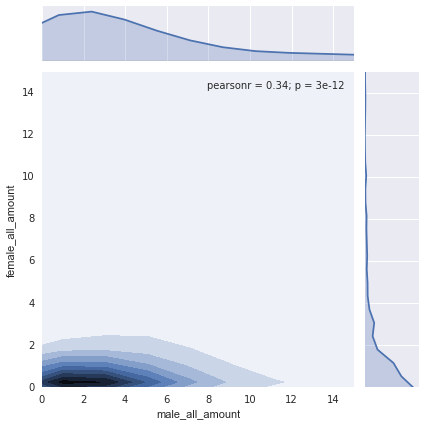

In [34]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, kind="kde",xlim=(0,15), ylim=(0,15))
#g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")